
1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).

2. Lakukan clustering dengan HDBSCAN.

3. Laporkan hasil:

    - Jumlah cluster yang terbentuk.

    - Banyaknya noise.

    - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).

4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import hdbscan


from sklearn.datasets import load_iris

In [3]:
def plot(X, labels, probabilities=None, parameters=None, ground_truth=False, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(10, 4))
    labels = labels if labels is not None else np.ones(X.shape[0])
    probabilities = probabilities if probabilities is not None else np.ones(X.shape[0])
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    proba_map = {idx: probabilities[idx] for idx in range(len(labels))}
    
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]  # warna hitam untuk noise
        class_index = (labels == k).nonzero()[0]
        for ci in class_index:
            ax.plot(
                X[ci, 0],
                X[ci, 1],
                "x" if k == -1 else "o",
                markerfacecolor=tuple(col),
                markeredgecolor="k",
                markersize=4 if k == -1 else 1 + 5 * proba_map[ci],
            )
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    preamble = "True" if ground_truth else "Estimated"
    title = f"{preamble} number of clusters: {n_clusters_}"
    if parameters is not None:
        parameters_str = ", ".join(f"{k}={v}" for k, v in parameters.items())
        title += f" | {parameters_str}"
    ax.set_title(title)
    plt.tight_layout()

c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

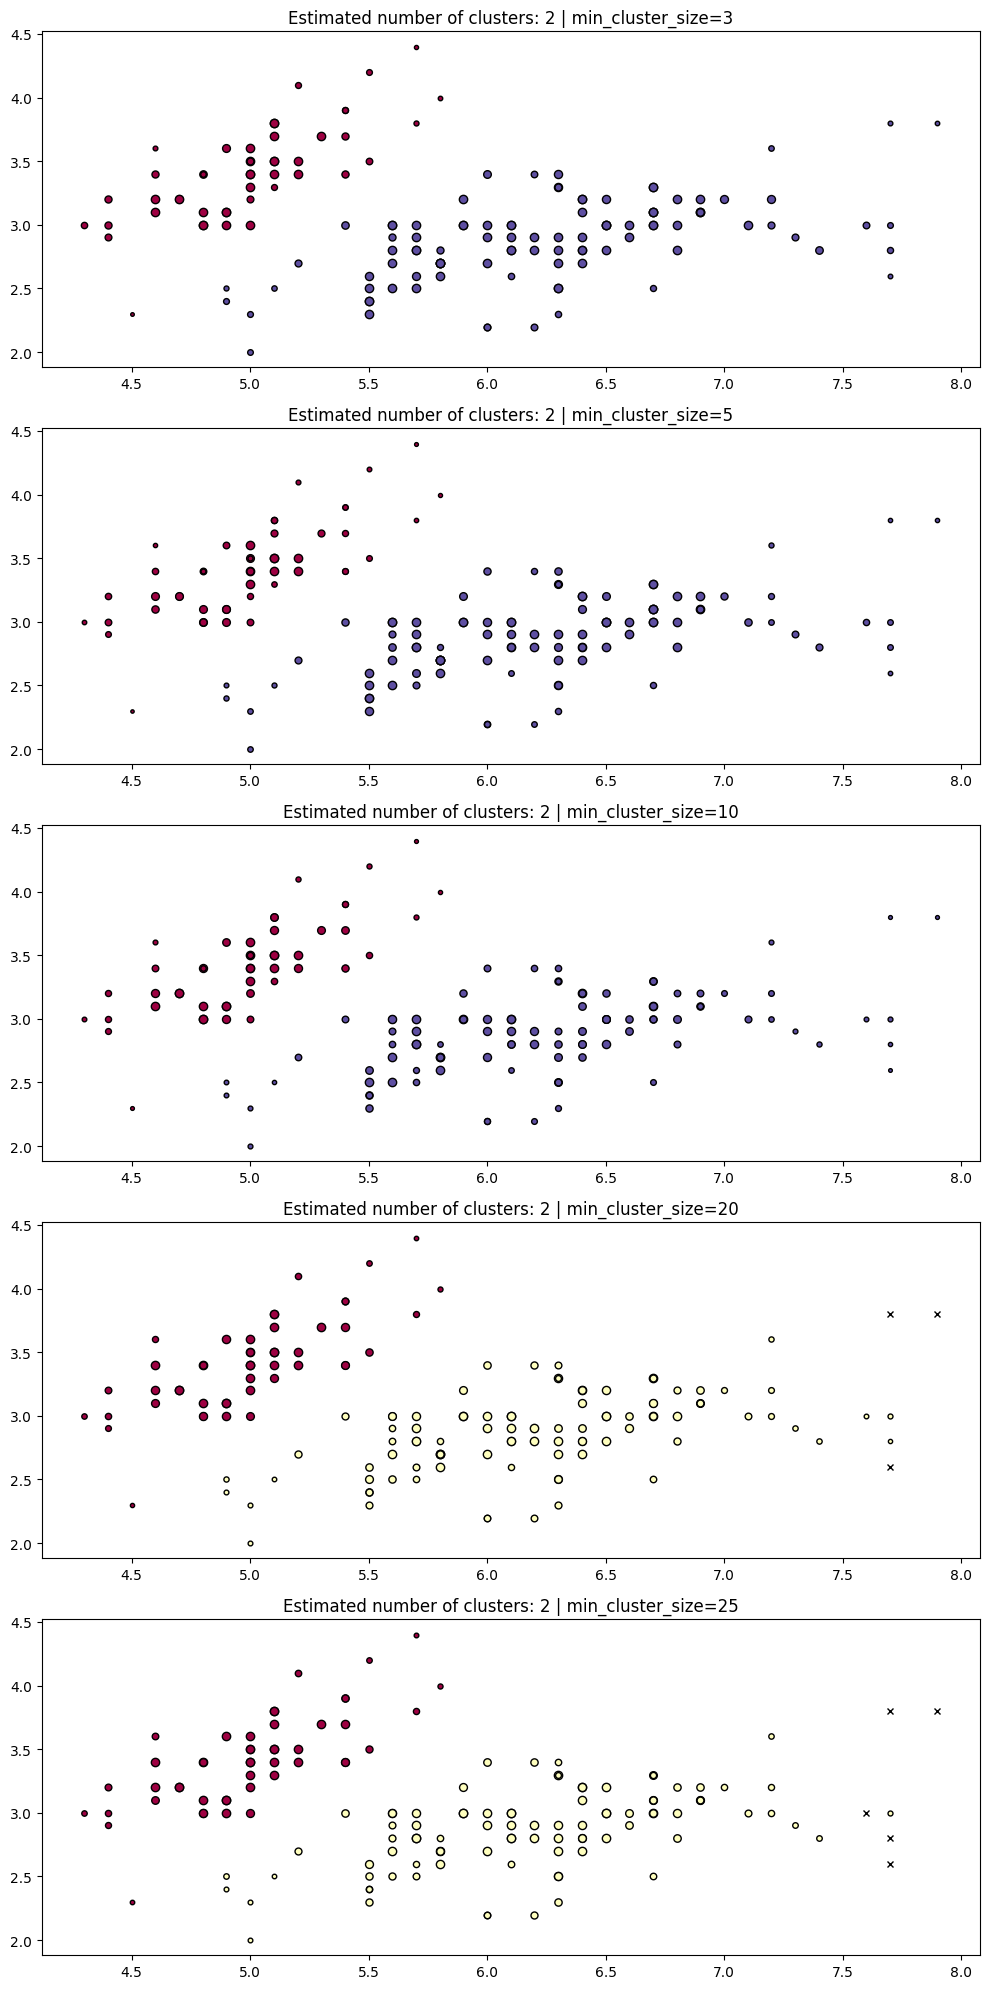

In [ ]:
X, labels_true = load_iris(return_X_y=True)

# Lakukan clustering dengan HDBSCAN.

PARAM = ({"min_cluster_size": 3}, {"min_cluster_size": 5}, {"min_cluster_size": 10}, {"min_cluster_size": 20}, {"min_cluster_size": 25})
fig, axes = plt.subplots(5, 1, figsize=(10, 20))
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X, hdb.labels_, hdb.probabilities_, param, ax=axes[i])

Laporkan hasil:

    - Jumlah cluster yang terbentuk.

    - Banyaknya noise.

    - Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu)

=== LAPORAN HASIL CLUSTERING HDBSCAN ===

Parameter: min_cluster_size=3
Jumlah cluster: 2
Banyaknya noise: 0
Persentase noise: 0.0%
----------------------------------------
Parameter: min_cluster_size=5
Jumlah cluster: 2
Banyaknya noise: 0
Persentase noise: 0.0%
----------------------------------------
Parameter: min_cluster_size=10
Jumlah cluster: 2
Banyaknya noise: 0
Persentase noise: 0.0%
----------------------------------------
Parameter: min_cluster_size=20
Jumlah cluster: 2
Banyaknya noise: 3
Persentase noise: 2.0%
----------------------------------------
Parameter: min_cluster_size=25
Jumlah cluster: 2
Banyaknya noise: 5
Persentase noise: 3.3%
----------------------------------------

Variance explained by PCA: 0.978


c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\GIO\anaconda3\envs\py312_env\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finit

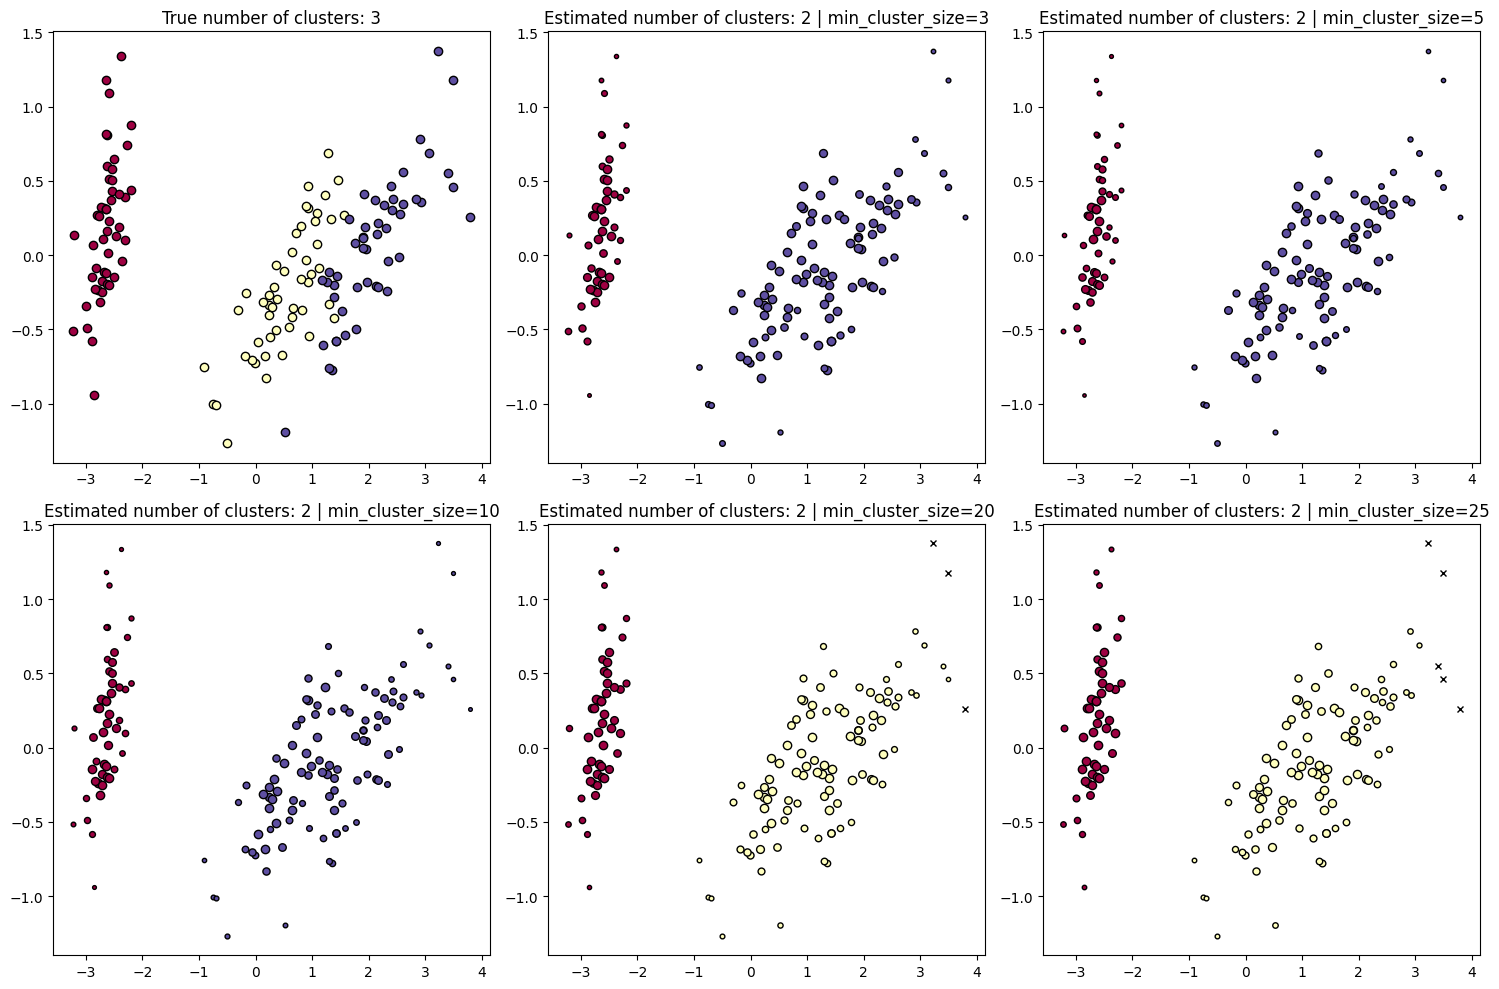

In [ ]:
from sklearn.decomposition import PCA

# Laporkan hasil untuk setiap parameter
print("=== LAPORAN HASIL CLUSTERING HDBSCAN ===\n")

for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    
    # Jumlah cluster yang terbentuk
    n_clusters = len(set(hdb.labels_)) - (1 if -1 in hdb.labels_ else 0)
    
    # Banyaknya noise (label -1)
    n_noise = list(hdb.labels_).count(-1)
    
    print(f"Parameter: min_cluster_size={param['min_cluster_size']}")
    print(f"Jumlah cluster: {n_clusters}")
    print(f"Banyaknya noise: {n_noise}")
    print(f"Persentase noise: {n_noise/len(X)*100:.1f}%")
    print("-" * 40)

# Visualisasi dengan PCA untuk reduksi dimensi
# Reduksi dimensi dari 4D ke 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print(f"\nVariance explained by PCA: {pca.explained_variance_ratio_.sum():.3f}")

# Plot hasil clustering dengan data yang sudah direduksi dimensinya
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot ground truth
plot(X_pca, labels_true, ground_truth=True, ax=axes[0])

# Plot hasil HDBSCAN dengan berbagai parameter
for i, param in enumerate(PARAM):
    hdb = hdbscan.HDBSCAN(**param).fit(X)
    plot(X_pca, hdb.labels_, hdb.probabilities_, param, ax=axes[i+1])

plt.tight_layout()
plt.show()

Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?


1. Ketidaksesuaian Jumlah Cluster: 
    - Dataset Iris memiliki 3 kelas asli (Setosa, Versicolor, Virginica)
    - HDBSCAN hanya mengidentifikasi 2 cluster pada semua parameter yang diuji
    - Ini menunjukkan bahwa HDBSCAN gagal mendeteksi struktur cluster yang sebenarnya

2. Pengaruh Parameter `min_cluster_size`:
    - Parameter yang lebih kecil (3, 5) menghasilkan lebih sedikit noise
    - Parameter yang lebih besar (20, 25) menghasilkan lebih banyak noise (hingga 5 titik)
    - Namun, jumlah cluster tetap konsisten di 2 cluster

3. Identifikasi Cluster:
    - HDBSCAN berhasil memisahkan Setosa dari kelas lainnya (cluster yang jelas terpisah)
    - HDBSCAN gagal memisahkan Versicolor dan Virginica yang memiliki karakteristik lebih mirip
    - Hal ini terlihat jelas dari visualisasi PCA dimana dua kelas tersebut memang overlap


HDBSCAN tidak sepenuhnya sesuai dengan label asli dataset Iris. Algoritma ini berhasil mengidentifikasi Setosa sebagai cluster terpisah (yang memang paling berbeda), namun gagal membedakan antara Versicolor dan Virginica yang memiliki karakteristik serupa. Hal ini menunjukkan bahwa untuk dataset dengan cluster yang overlap seperti Iris, HDBSCAN mungkin tidak optimal dan algoritma clustering lain seperti K-Means atau Gaussian Mixture Models mungkin lebih sesuai.